# MSDS-432: Module 6 - Implement a Breadth-first Search Algorithm  
Jason Adam  

## Imports

In [1]:
from collections import deque
import random
import string
import time

import matplotlib.pyplot as plt
import pandas as pd

%load_ext blackcellmagic

## 1. Create a five level 'connections' graph (all unique, no duplicates).  
* The first level should have five people and each person in first level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)  
* Each person in the second level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)  
* Continue the same for third, fourth, and fifth levels  
* There should be no reverse connections (i.e. first level can connect to second level but second cannot have any reverse connection with the first, and so on for 3rd, 4th, and 5th levels)

In [2]:
def create_follower_graph():
    levels: int = 5
    followers: int = 5
    graph: dict = {}
    ppl_follow_lvls: dict = {}
    # List of members in each level
    lvl_ttls: list = [pow(followers, i) for i in range(1, levels + 1)]
    # Generate Random names for each level
    for i in lvl_ttls:
        random.seed(i)
        ppl_follow_lvls[i]: list = [
            "".join(random.choices(string.ascii_letters, k=5)) for _ in range(i)
        ]
    # Create queue of each level
    deqs = [deque(ppl_follow_lvls[i]) for i in lvl_ttls]
    # Create each name with empty list
    for v in ppl_follow_lvls.values():
        for name in v:
            graph[name] = []
    # Populate followers (last group won't have any)
    for i, v in enumerate(lvl_ttls):
        if i == len(lvl_ttls) - 1:
            break
        for f in ppl_follow_lvls[v]:
            if len(graph[f]) == 5:
                continue
            else:
                while len(graph[f]) < 5:
                    graph[f].append(deqs[i + 1].popleft())
    return ppl_follow_lvls, graph


ppl_follow_lvls, graph = create_follower_graph()

In [233]:
# Verify Final Followers don't have followers
cnt = 0
for k, v in graph.items():
    if len(v) == 0:
        cnt += 1

print(cnt)

3125


## 2. Breadth-First Search  
Now search for three people on each level and capture the time for each search.

In [234]:
def bf_search(search_name: str, lvl: int) -> dict:
    search_queue = deque()
    # Use starting 5 to get going.
    search_queue += ppl_follow_lvls[5]
    # This array is how you keep track of which people you've searched before.
    searched = []
    # Create dict of name and search time.
    prsn = {"name": search_name, "lvl": lvl}
    start_time = time.perf_counter()
    while search_queue:
        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if person not in searched:
            if person == search_name:
                end_time = time.perf_counter()
                ttl_time = (end_time - start_time) * 1000
                prsn["search_time"] = ttl_time
                return prsn
            else:
                search_queue += graph[person]
                # Marks this person as searched
                searched.append(person)
    return False

In [235]:
# Create Random Samples
def rand_samples() -> list:
    search_samples = []
    cnt = 0
    for k, v in ppl_follow_lvls.items():
        cnt += 1
        samples = {}
        samples["level"] = cnt
        random.seed(432)
        samples["names"] = random.choices(v, k=3)
        search_samples.append(samples)
    return search_samples


samples = rand_samples()
samples

[{'level': 1, 'names': ['UfymC', 'DaloV', 'GMPXM']},
 {'level': 2, 'names': ['GCxpz', 'fNvPK', 'HcXnp']},
 {'level': 3, 'names': ['GawUe', 'YokFf', 'BzGYt']},
 {'level': 4, 'names': ['ogfUo', 'pbcuW', 'MMZML']},
 {'level': 5, 'names': ['JxDMp', 'CZlxO', 'MrMcG']}]

## 3. Summary Table  
Organize the results of the study into an table showing the 'name' that you searched for, the level of the search (first, second, third, fourth, fifth), and the time it took.  Discuss any findings.

In [236]:
def comparison_table() -> pd.DataFrame:
    search_times = []
    for s in samples:
        for v in s["names"]:
            search_times.append(bf_search(v, s["level"]))
    return pd.DataFrame(search_times)


df = comparison_table()
df

,name,lvl,search_time
0,UfymC,1,0.003552
1,DaloV,1,0.001801
2,GMPXM,1,0.000303
3,GCxpz,2,0.014331
4,fNvPK,2,0.012630
5,HcXnp,2,0.002869
6,GawUe,3,0.153354
7,YokFf,3,0.170620
8,BzGYt,3,0.028278
9,ogfUo,4,2.888398


It looks as though the deeper in the graph that the search had to go, the longer the search took. This makes sense as we have to traverse more names to find the one in question. The final person in the table "MrMcG" took 7 milliseconds to find compared to longer run times for the two other 5th level names. This is interesting, and my initial guess is that this person was found in one of the earlier 4th level follower lists than the other two.  I'll attempt to confirm below.

In [242]:
# Get Keys from main graph (level 4 people) for lvl 5 followers
for i in df.loc[df.lvl == 5]["name"].tolist():
    for k, v in graph.items():
        if i in v:
            print(f"name={i} key={k}")

name=JxDMp key=ogfUo
name=CZlxO key=pbcuW
name=MrMcG key=MMZML


In [244]:
# Print indices of lvl 4 folks that had level 5 followers
# in the summary table.
lvl4 = ["ogfUo", "pbcuW", "MMZML"]

for v in ppl_follow_lvls.values():
    for i, n in enumerate(v):
        for l in lvl4:
            if n == l:
                print(f"name={l} index={i}")

name=MMZML index=39
name=ogfUo index=364
name=pbcuW index=415


As I suspected, the shortest time was from a level 4 name being very shallow in the overall list of 625 lvl 4 names. This means that the search didn't have to go as deep to find their follower in level 5.

## 4. Summary Graph  
Using the average time for each level, create a plot and compare times at each level (five bars or any other suitable visual).  Discuss any findings.

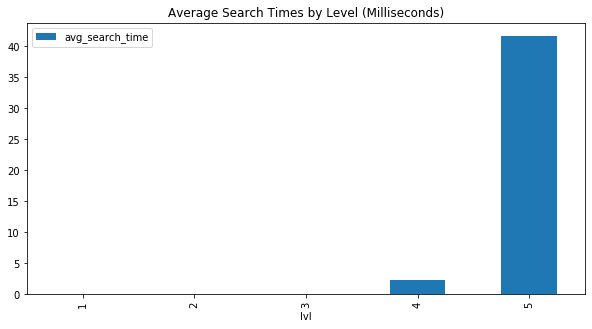

In [245]:
avg_times = (
    df.groupby(["lvl"])
    .agg(avg_search_time=pd.NamedAgg("search_time", "mean"))
    .reset_index()
)

avg_times.plot.bar(
    x="lvl",
    y="avg_search_time",
    figsize=(10, 5),
    title="Average Search Times by Level (Milliseconds)",
)

This highlights the increase in time rather well as the graph gets deeper, but we can't see the first 3 levels. Let's try plotting on a log scale so we can at least see them.

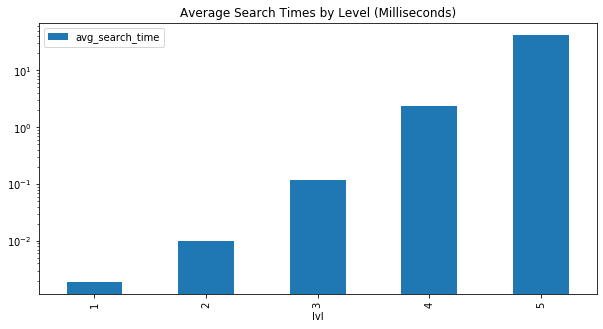

In [246]:
avg_times.plot.bar(
    x="lvl",
    y="avg_search_time",
    figsize=(10, 5),
    title="Average Search Times by Level (Milliseconds)",
    logy=True
)

We can now see our relationship a bit clearer.

## Executive Summary  
Overall, the search performed how we would expect. Breadth-first search has a big O run-time of $O(V+E)$. The $V$ and $E$ represent vertices and edges in the graph. As our follower graph scales out, we must add many more edges and vertices, hence we have many more names to search. In the long-run this search method can get quite expensive if the names we are searching for are consistently deep within our graph, therefore I would only recommend implementing this solution for shallower graphs as to not hinder performance. If there is a predetermined number of levels in a graph with a predetermined number of followers, then this solution could perform nicely as the timing will be quite predictable and fast. If our graph is to expand to greater depths, then management should consider alternative solutions.

### Reference  
[1] Bhargava, A. Y. (2016). Grokking algorithms: An illustrated guide for programmers and other curious people.